In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import itertools
import solar_sensor_env

In [2]:
import simple_solar_env
import gym
from gym.envs.registration import registry, register, make, spec
solarfname = 'testing'
solarrecord = solar_sensor_env.get_generated_power(solarfname)
register(id='SolarSensor-v0',
        entry_point='solar_sensor_env:SolarSensorEnv',
        kwargs = {'max_batt':100,'num_sensors':4, 'solarpowerrecord':solarrecord}
        )
env = gym.make('SolarSensor-v0')

In [3]:
def wrap_action(sensornum, actionnum):
    return (sensornum,actionnum)

def find_active(observation):
    #if any sensor is active return the sensorname
    #else return None
    active_sensor = [k for k,v in observation.items() if v[0]==0]
    assert len(active_sensor)<=1
    return active_sensor
    
class SimpleNetworkAgent(object):
    """The world's simplest agent!"""
    def __init__(self, env,n_episodes=1, max_env_steps = int(365*24/0.5)):
        self.env = env
        self.n_episodes = n_episodes
        if max_env_steps is not None: self.env._max_episode_steps = max_env_steps
        self.full_record = []
    def act(self, observation):
        #recharge if battery gets below 3 
        # status 0: On 1: PreSleep 2: Sleep
        active_sensors = find_active(observation)
        if active_sensors:
            sensor = active_sensors[0]
            sensorname, sensornum = sensor
            status, battery, diff = observation[sensor]
            actionnum = 1 if battery <3 else 0
            wrapped_action = wrap_action(int(sensornum), actionnum)
        else:
            sleepingsensors = [(k,v) for k,v in observation.items() if v[0]==2]
            maxbattsensor = max(sleepingsensors, key = lambda s: s[1][1])
            sensornum = int(maxbattsensor[0][1])
            wrapped_action = wrap_action(sensornum, 0)#wakeup
        return wrapped_action
    def run(self, render=True):
        for e in range(self.n_episodes):
            print('#######New episode#############')
            done=False
            observation = self.env.reset()
            reward_sum = 0
            i=0
            while not done and i<self.env._max_episode_steps:
                if render: self.env.render()
                action = agent.act(observation)
                print('observation:{}, action:{}'.format(observation, action))
                observation, reward, done, info = self.env.step(action)
                print('new observation:{}, reward:{}'.format(observation, reward))
                reward_sum += reward
                i+=1
            print("episode: {}/{}, score: {}".format(e, self.n_episodes, reward_sum))
            self.full_record.append(self.env.record)
        return e

In [4]:
agent = SimpleNetworkAgent(env)
agent.run()

#######New episode#############
observation:{'S0': (0, 100, 0), 'S3': (2, 100, 0), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, action:(0, 0)
new observation:{'S0': (0, 97, -3), 'S3': (2, 99, -1), 'S2': (2, 99, -1), 'S1': (2, 99, -1)}, reward:1
observation:{'S0': (0, 97, -3), 'S3': (2, 99, -1), 'S2': (2, 99, -1), 'S1': (2, 99, -1)}, action:(0, 0)
new observation:{'S0': (0, 94, -3), 'S3': (2, 98, -1), 'S2': (2, 98, -1), 'S1': (2, 98, -1)}, reward:1
observation:{'S0': (0, 94, -3), 'S3': (2, 98, -1), 'S2': (2, 98, -1), 'S1': (2, 98, -1)}, action:(0, 0)
new observation:{'S0': (0, 91, -3), 'S3': (2, 97, -1), 'S2': (2, 97, -1), 'S1': (2, 97, -1)}, reward:1
observation:{'S0': (0, 91, -3), 'S3': (2, 97, -1), 'S2': (2, 97, -1), 'S1': (2, 97, -1)}, action:(0, 0)
new observation:{'S0': (0, 88, -3), 'S3': (2, 96, -1), 'S2': (2, 96, -1), 'S1': (2, 96, -1)}, reward:1
observation:{'S0': (0, 88, -3), 'S3': (2, 96, -1), 'S2': (2, 96, -1), 'S1': (2, 96, -1)}, action:(0, 0)
new observation:{'S0': (0, 85, -3), 

observation:{'S0': (2, 1, 1), 'S3': (1, 0, 0), 'S2': (2, 1, 1), 'S1': (2, 1, 1)}, action:(0, 0)
new observation:{'S0': (0, 4, 3), 'S3': (2, 1, 1), 'S2': (2, 3, 2), 'S1': (2, 4, 3)}, reward:0
observation:{'S0': (0, 4, 3), 'S3': (2, 1, 1), 'S2': (2, 3, 2), 'S1': (2, 4, 3)}, action:(0, 0)
new observation:{'S0': (0, 6, 2), 'S3': (2, 5, 4), 'S2': (2, 6, 3), 'S1': (2, 9, 5)}, reward:1
observation:{'S0': (0, 6, 2), 'S3': (2, 5, 4), 'S2': (2, 6, 3), 'S1': (2, 9, 5)}, action:(0, 0)
new observation:{'S0': (0, 9, 3), 'S3': (2, 10, 5), 'S2': (2, 10, 4), 'S1': (2, 15, 6)}, reward:1
observation:{'S0': (0, 9, 3), 'S3': (2, 10, 5), 'S2': (2, 10, 4), 'S1': (2, 15, 6)}, action:(0, 0)
new observation:{'S0': (0, 13, 4), 'S3': (2, 16, 6), 'S2': (2, 14, 4), 'S1': (2, 21, 6)}, reward:1
observation:{'S0': (0, 13, 4), 'S3': (2, 16, 6), 'S2': (2, 14, 4), 'S1': (2, 21, 6)}, action:(0, 0)
new observation:{'S0': (0, 17, 4), 'S3': (2, 22, 6), 'S2': (2, 19, 5), 'S1': (2, 28, 7)}, reward:1
observation:{'S0': (0, 17, 

new observation:{'S0': (2, 25, -1), 'S3': (2, 45, -1), 'S2': (2, 61, -1), 'S1': (0, 6, -3)}, reward:1
observation:{'S0': (2, 25, -1), 'S3': (2, 45, -1), 'S2': (2, 61, -1), 'S1': (0, 6, -3)}, action:(1, 0)
new observation:{'S0': (2, 24, -1), 'S3': (2, 44, -1), 'S2': (2, 60, -1), 'S1': (0, 3, -3)}, reward:1
observation:{'S0': (2, 24, -1), 'S3': (2, 44, -1), 'S2': (2, 60, -1), 'S1': (0, 3, -3)}, action:(1, 0)
new observation:{'S0': (2, 23, -1), 'S3': (2, 43, -1), 'S2': (2, 59, -1), 'S1': (0, 0, -3)}, reward:1
observation:{'S0': (2, 23, -1), 'S3': (2, 43, -1), 'S2': (2, 59, -1), 'S1': (0, 0, -3)}, action:(1, 1)
new observation:{'S0': (2, 22, -1), 'S3': (2, 42, -1), 'S2': (2, 58, -1), 'S1': (1, 0, 0)}, reward:0
observation:{'S0': (2, 22, -1), 'S3': (2, 42, -1), 'S2': (2, 58, -1), 'S1': (1, 0, 0)}, action:(2, 0)
new observation:{'S0': (2, 21, -1), 'S3': (2, 41, -1), 'S2': (0, 57, -1), 'S1': (2, 0, 0)}, reward:0
observation:{'S0': (2, 21, -1), 'S3': (2, 41, -1), 'S2': (0, 57, -1), 'S1': (2, 0

new observation:{'S0': (2, 62, -1), 'S3': (0, 16, -3), 'S2': (2, 27, -1), 'S1': (2, 79, -1)}, reward:1
observation:{'S0': (2, 62, -1), 'S3': (0, 16, -3), 'S2': (2, 27, -1), 'S1': (2, 79, -1)}, action:(3, 0)
new observation:{'S0': (2, 61, -1), 'S3': (0, 13, -3), 'S2': (2, 26, -1), 'S1': (2, 78, -1)}, reward:1
observation:{'S0': (2, 61, -1), 'S3': (0, 13, -3), 'S2': (2, 26, -1), 'S1': (2, 78, -1)}, action:(3, 0)
new observation:{'S0': (2, 60, -1), 'S3': (0, 10, -3), 'S2': (2, 25, -1), 'S1': (2, 77, -1)}, reward:1
observation:{'S0': (2, 60, -1), 'S3': (0, 10, -3), 'S2': (2, 25, -1), 'S1': (2, 77, -1)}, action:(3, 0)
new observation:{'S0': (2, 59, -1), 'S3': (0, 7, -3), 'S2': (2, 24, -1), 'S1': (2, 76, -1)}, reward:1
observation:{'S0': (2, 59, -1), 'S3': (0, 7, -3), 'S2': (2, 24, -1), 'S1': (2, 76, -1)}, action:(3, 0)
new observation:{'S0': (2, 58, -1), 'S3': (0, 4, -3), 'S2': (2, 23, -1), 'S1': (2, 75, -1)}, reward:1
observation:{'S0': (2, 58, -1), 'S3': (0, 4, -3), 'S2': (2, 23, -1), 'S1

new observation:{'S0': (0, 30, 3), 'S3': (2, 58, 5), 'S2': (2, 41, 4), 'S1': (2, 16, 6)}, reward:1
observation:{'S0': (0, 30, 3), 'S3': (2, 58, 5), 'S2': (2, 41, 4), 'S1': (2, 16, 6)}, action:(0, 0)
new observation:{'S0': (0, 34, 4), 'S3': (2, 64, 6), 'S2': (2, 46, 5), 'S1': (2, 22, 6)}, reward:1
observation:{'S0': (0, 34, 4), 'S3': (2, 64, 6), 'S2': (2, 46, 5), 'S1': (2, 22, 6)}, action:(0, 0)
new observation:{'S0': (0, 38, 4), 'S3': (2, 70, 6), 'S2': (2, 52, 6), 'S1': (2, 29, 7)}, reward:1
observation:{'S0': (0, 38, 4), 'S3': (2, 70, 6), 'S2': (2, 52, 6), 'S1': (2, 29, 7)}, action:(0, 0)
new observation:{'S0': (0, 40, 2), 'S3': (2, 74, 4), 'S2': (2, 56, 4), 'S1': (2, 33, 4)}, reward:1
observation:{'S0': (0, 40, 2), 'S3': (2, 74, 4), 'S2': (2, 56, 4), 'S1': (2, 33, 4)}, action:(0, 0)
new observation:{'S0': (0, 42, 2), 'S3': (2, 78, 4), 'S2': (2, 60, 4), 'S1': (2, 37, 4)}, reward:1
observation:{'S0': (0, 42, 2), 'S3': (2, 78, 4), 'S2': (2, 60, 4), 'S1': (2, 37, 4)}, action:(0, 0)
new o

new observation:{'S0': (2, 2, 0), 'S3': (2, 1, 0), 'S2': (2, 0, 0), 'S1': (0, 4, 0)}, reward:0
observation:{'S0': (2, 2, 0), 'S3': (2, 1, 0), 'S2': (2, 0, 0), 'S1': (0, 4, 0)}, action:(1, 0)
new observation:{'S0': (2, 2, 0), 'S3': (2, 1, 0), 'S2': (2, 0, 0), 'S1': (0, 2, -2)}, reward:0
observation:{'S0': (2, 2, 0), 'S3': (2, 1, 0), 'S2': (2, 0, 0), 'S1': (0, 2, -2)}, action:(1, 1)
new observation:{'S0': (2, 2, 0), 'S3': (2, 2, 1), 'S2': (2, 0, 0), 'S1': (1, 0, -2)}, reward:0
observation:{'S0': (2, 2, 0), 'S3': (2, 2, 1), 'S2': (2, 0, 0), 'S1': (1, 0, -2)}, action:(0, 0)
new observation:{'S0': (0, 2, 0), 'S3': (2, 2, 0), 'S2': (2, 0, 0), 'S1': (2, 0, 0)}, reward:0
observation:{'S0': (0, 2, 0), 'S3': (2, 2, 0), 'S2': (2, 0, 0), 'S1': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (1, 0, -2), 'S3': (2, 1, -1), 'S2': (2, 0, 0), 'S1': (2, 0, 0)}, reward:0
observation:{'S0': (1, 0, -2), 'S3': (2, 1, -1), 'S2': (2, 0, 0), 'S1': (2, 0, 0)}, action:(3, 0)
new observation:{'S0': (2, 0, 0), 'S3

new observation:{'S0': (2, 0, 0), 'S3': (2, 32, -1), 'S2': (0, 21, -3), 'S1': (2, 0, 0)}, reward:0
observation:{'S0': (2, 0, 0), 'S3': (2, 32, -1), 'S2': (0, 21, -3), 'S1': (2, 0, 0)}, action:(2, 0)
new observation:{'S0': (2, 0, 0), 'S3': (2, 31, -1), 'S2': (0, 18, -3), 'S1': (2, 0, 0)}, reward:0
observation:{'S0': (2, 0, 0), 'S3': (2, 31, -1), 'S2': (0, 18, -3), 'S1': (2, 0, 0)}, action:(2, 0)
new observation:{'S0': (2, 0, 0), 'S3': (2, 30, -1), 'S2': (0, 15, -3), 'S1': (2, 0, 0)}, reward:0
observation:{'S0': (2, 0, 0), 'S3': (2, 30, -1), 'S2': (0, 15, -3), 'S1': (2, 0, 0)}, action:(2, 0)
new observation:{'S0': (2, 0, 0), 'S3': (2, 29, -1), 'S2': (0, 12, -3), 'S1': (2, 0, 0)}, reward:0
observation:{'S0': (2, 0, 0), 'S3': (2, 29, -1), 'S2': (0, 12, -3), 'S1': (2, 0, 0)}, action:(2, 0)
new observation:{'S0': (2, 0, 0), 'S3': (2, 28, -1), 'S2': (0, 9, -3), 'S1': (2, 0, 0)}, reward:0
observation:{'S0': (2, 0, 0), 'S3': (2, 28, -1), 'S2': (0, 9, -3), 'S1': (2, 0, 0)}, action:(2, 0)
new obs

new observation:{'S0': (0, 37, -3), 'S3': (2, 0, 0), 'S2': (2, 38, -1), 'S1': (2, 16, -1)}, reward:0
observation:{'S0': (0, 37, -3), 'S3': (2, 0, 0), 'S2': (2, 38, -1), 'S1': (2, 16, -1)}, action:(0, 0)
new observation:{'S0': (0, 34, -3), 'S3': (2, 0, 0), 'S2': (2, 37, -1), 'S1': (2, 15, -1)}, reward:0
observation:{'S0': (0, 34, -3), 'S3': (2, 0, 0), 'S2': (2, 37, -1), 'S1': (2, 15, -1)}, action:(0, 0)
new observation:{'S0': (0, 31, -3), 'S3': (2, 0, 0), 'S2': (2, 36, -1), 'S1': (2, 14, -1)}, reward:0
observation:{'S0': (0, 31, -3), 'S3': (2, 0, 0), 'S2': (2, 36, -1), 'S1': (2, 14, -1)}, action:(0, 0)
new observation:{'S0': (0, 28, -3), 'S3': (2, 0, 0), 'S2': (2, 35, -1), 'S1': (2, 13, -1)}, reward:0
observation:{'S0': (0, 28, -3), 'S3': (2, 0, 0), 'S2': (2, 35, -1), 'S1': (2, 13, -1)}, action:(0, 0)
new observation:{'S0': (0, 25, -3), 'S3': (2, 0, 0), 'S2': (2, 34, -1), 'S1': (2, 12, -1)}, reward:0
observation:{'S0': (0, 25, -3), 'S3': (2, 0, 0), 'S2': (2, 34, -1), 'S1': (2, 12, -1)},

new observation:{'S0': (2, 100, 0), 'S3': (2, 97, 4), 'S2': (0, 99, 3), 'S1': (2, 100, 0)}, reward:1
observation:{'S0': (2, 100, 0), 'S3': (2, 97, 4), 'S2': (0, 99, 3), 'S1': (2, 100, 0)}, action:(2, 0)
new observation:{'S0': (2, 100, 0), 'S3': (2, 99, 2), 'S2': (0, 99, 0), 'S1': (2, 100, 0)}, reward:1
observation:{'S0': (2, 100, 0), 'S3': (2, 99, 2), 'S2': (0, 99, 0), 'S1': (2, 100, 0)}, action:(2, 0)
new observation:{'S0': (2, 100, 0), 'S3': (2, 99, 0), 'S2': (0, 97, -2), 'S1': (2, 100, 0)}, reward:1
observation:{'S0': (2, 100, 0), 'S3': (2, 99, 0), 'S2': (0, 97, -2), 'S1': (2, 100, 0)}, action:(2, 0)
new observation:{'S0': (2, 100, 0), 'S3': (2, 100, 1), 'S2': (0, 96, -1), 'S1': (2, 100, 0)}, reward:1
observation:{'S0': (2, 100, 0), 'S3': (2, 100, 1), 'S2': (0, 96, -1), 'S1': (2, 100, 0)}, action:(2, 0)
new observation:{'S0': (2, 100, 0), 'S3': (2, 100, 0), 'S2': (0, 94, -2), 'S1': (2, 100, 0)}, reward:1
observation:{'S0': (2, 100, 0), 'S3': (2, 100, 0), 'S2': (0, 94, -2), 'S1': (2,

new observation:{'S0': (2, 0, 0), 'S3': (0, 53, -3), 'S2': (2, 25, 0), 'S1': (2, 74, 0)}, reward:0
observation:{'S0': (2, 0, 0), 'S3': (0, 53, -3), 'S2': (2, 25, 0), 'S1': (2, 74, 0)}, action:(3, 0)
new observation:{'S0': (2, 0, 0), 'S3': (0, 51, -2), 'S2': (2, 25, 0), 'S1': (2, 74, 0)}, reward:0
observation:{'S0': (2, 0, 0), 'S3': (0, 51, -2), 'S2': (2, 25, 0), 'S1': (2, 74, 0)}, action:(3, 0)
new observation:{'S0': (2, 2, 2), 'S3': (0, 51, 0), 'S2': (2, 27, 2), 'S1': (2, 76, 2)}, reward:0
observation:{'S0': (2, 2, 2), 'S3': (0, 51, 0), 'S2': (2, 27, 2), 'S1': (2, 76, 2)}, action:(3, 0)
new observation:{'S0': (2, 5, 3), 'S3': (0, 53, 2), 'S2': (2, 31, 4), 'S1': (2, 80, 4)}, reward:1
observation:{'S0': (2, 5, 3), 'S3': (0, 53, 2), 'S2': (2, 31, 4), 'S1': (2, 80, 4)}, action:(3, 0)
new observation:{'S0': (2, 8, 3), 'S3': (0, 55, 2), 'S2': (2, 34, 3), 'S1': (2, 83, 3)}, reward:1
observation:{'S0': (2, 8, 3), 'S3': (0, 55, 2), 'S2': (2, 34, 3), 'S1': (2, 83, 3)}, action:(3, 0)
new observa

observation:{'S0': (2, 0, 0), 'S3': (2, 43, -1), 'S2': (2, 77, -1), 'S1': (0, 76, -3)}, action:(1, 0)
new observation:{'S0': (2, 0, 0), 'S3': (2, 42, -1), 'S2': (2, 76, -1), 'S1': (0, 73, -3)}, reward:0
observation:{'S0': (2, 0, 0), 'S3': (2, 42, -1), 'S2': (2, 76, -1), 'S1': (0, 73, -3)}, action:(1, 0)
new observation:{'S0': (2, 1, 1), 'S3': (2, 43, 1), 'S2': (2, 76, 0), 'S1': (0, 71, -2)}, reward:0
observation:{'S0': (2, 1, 1), 'S3': (2, 43, 1), 'S2': (2, 76, 0), 'S1': (0, 71, -2)}, action:(1, 0)
new observation:{'S0': (2, 3, 2), 'S3': (2, 45, 2), 'S2': (2, 78, 2), 'S1': (0, 71, 0)}, reward:1
observation:{'S0': (2, 3, 2), 'S3': (2, 45, 2), 'S2': (2, 78, 2), 'S1': (0, 71, 0)}, action:(1, 0)
new observation:{'S0': (2, 7, 4), 'S3': (2, 49, 4), 'S2': (2, 82, 4), 'S1': (0, 73, 2)}, reward:1
observation:{'S0': (2, 7, 4), 'S3': (2, 49, 4), 'S2': (2, 82, 4), 'S1': (0, 73, 2)}, action:(1, 0)
new observation:{'S0': (2, 12, 5), 'S3': (2, 55, 6), 'S2': (2, 87, 5), 'S1': (0, 76, 3)}, reward:1
obs

new observation:{'S0': (2, 15, 1), 'S3': (0, 35, -2), 'S2': (2, 89, 1), 'S1': (2, 54, 1)}, reward:1
observation:{'S0': (2, 15, 1), 'S3': (0, 35, -2), 'S2': (2, 89, 1), 'S1': (2, 54, 1)}, action:(3, 0)
new observation:{'S0': (2, 16, 1), 'S3': (0, 33, -2), 'S2': (2, 90, 1), 'S1': (2, 55, 1)}, reward:1
observation:{'S0': (2, 16, 1), 'S3': (0, 33, -2), 'S2': (2, 90, 1), 'S1': (2, 55, 1)}, action:(3, 0)
new observation:{'S0': (2, 17, 1), 'S3': (0, 31, -2), 'S2': (2, 91, 1), 'S1': (2, 56, 1)}, reward:1
observation:{'S0': (2, 17, 1), 'S3': (0, 31, -2), 'S2': (2, 91, 1), 'S1': (2, 56, 1)}, action:(3, 0)
new observation:{'S0': (2, 16, -1), 'S3': (0, 28, -3), 'S2': (2, 90, -1), 'S1': (2, 55, -1)}, reward:1
observation:{'S0': (2, 16, -1), 'S3': (0, 28, -3), 'S2': (2, 90, -1), 'S1': (2, 55, -1)}, action:(3, 0)
new observation:{'S0': (2, 16, 0), 'S3': (0, 26, -2), 'S2': (2, 90, 0), 'S1': (2, 55, 0)}, reward:1
observation:{'S0': (2, 16, 0), 'S3': (0, 26, -2), 'S2': (2, 90, 0), 'S1': (2, 55, 0)}, act

new observation:{'S0': (0, 50, -3), 'S3': (2, 86, -1), 'S2': (2, 86, -1), 'S1': (2, 85, -1)}, reward:1
observation:{'S0': (0, 50, -3), 'S3': (2, 86, -1), 'S2': (2, 86, -1), 'S1': (2, 85, -1)}, action:(0, 0)
new observation:{'S0': (0, 47, -3), 'S3': (2, 85, -1), 'S2': (2, 85, -1), 'S1': (2, 84, -1)}, reward:1
observation:{'S0': (0, 47, -3), 'S3': (2, 85, -1), 'S2': (2, 85, -1), 'S1': (2, 84, -1)}, action:(0, 0)
new observation:{'S0': (0, 44, -3), 'S3': (2, 84, -1), 'S2': (2, 84, -1), 'S1': (2, 83, -1)}, reward:1
observation:{'S0': (0, 44, -3), 'S3': (2, 84, -1), 'S2': (2, 84, -1), 'S1': (2, 83, -1)}, action:(0, 0)
new observation:{'S0': (0, 41, -3), 'S3': (2, 83, -1), 'S2': (2, 83, -1), 'S1': (2, 82, -1)}, reward:1
observation:{'S0': (0, 41, -3), 'S3': (2, 83, -1), 'S2': (2, 83, -1), 'S1': (2, 82, -1)}, action:(0, 0)
new observation:{'S0': (0, 38, -3), 'S3': (2, 82, -1), 'S2': (2, 82, -1), 'S1': (2, 81, -1)}, reward:1
observation:{'S0': (0, 38, -3), 'S3': (2, 82, -1), 'S2': (2, 82, -1),

observation:{'S0': (2, 42, 3), 'S3': (2, 41, 3), 'S2': (0, 24, 0), 'S1': (2, 43, 3)}, action:(2, 0)
new observation:{'S0': (2, 44, 2), 'S3': (2, 43, 2), 'S2': (0, 24, 0), 'S1': (2, 45, 2)}, reward:1
observation:{'S0': (2, 44, 2), 'S3': (2, 43, 2), 'S2': (0, 24, 0), 'S1': (2, 45, 2)}, action:(2, 0)
new observation:{'S0': (2, 47, 3), 'S3': (2, 46, 3), 'S2': (0, 24, 0), 'S1': (2, 48, 3)}, reward:1
observation:{'S0': (2, 47, 3), 'S3': (2, 46, 3), 'S2': (0, 24, 0), 'S1': (2, 48, 3)}, action:(2, 0)
new observation:{'S0': (2, 48, 1), 'S3': (2, 48, 2), 'S2': (0, 23, -1), 'S1': (2, 49, 1)}, reward:1
observation:{'S0': (2, 48, 1), 'S3': (2, 48, 2), 'S2': (0, 23, -1), 'S1': (2, 49, 1)}, action:(2, 0)
new observation:{'S0': (2, 53, 5), 'S3': (2, 53, 5), 'S2': (0, 25, 2), 'S1': (2, 53, 4)}, reward:1
observation:{'S0': (2, 53, 5), 'S3': (2, 53, 5), 'S2': (0, 25, 2), 'S1': (2, 53, 4)}, action:(2, 0)
new observation:{'S0': (2, 57, 4), 'S3': (2, 58, 5), 'S2': (0, 27, 2), 'S1': (2, 57, 4)}, reward:1
obs

observation:{'S0': (0, 77, -3), 'S3': (2, 96, -1), 'S2': (2, 95, -1), 'S1': (2, 87, -1)}, action:(0, 0)
new observation:{'S0': (0, 74, -3), 'S3': (2, 95, -1), 'S2': (2, 94, -1), 'S1': (2, 86, -1)}, reward:1
observation:{'S0': (0, 74, -3), 'S3': (2, 95, -1), 'S2': (2, 94, -1), 'S1': (2, 86, -1)}, action:(0, 0)
new observation:{'S0': (0, 71, -3), 'S3': (2, 94, -1), 'S2': (2, 93, -1), 'S1': (2, 85, -1)}, reward:1
observation:{'S0': (0, 71, -3), 'S3': (2, 94, -1), 'S2': (2, 93, -1), 'S1': (2, 85, -1)}, action:(0, 0)
new observation:{'S0': (0, 68, -3), 'S3': (2, 93, -1), 'S2': (2, 92, -1), 'S1': (2, 84, -1)}, reward:1
observation:{'S0': (0, 68, -3), 'S3': (2, 93, -1), 'S2': (2, 92, -1), 'S1': (2, 84, -1)}, action:(0, 0)
new observation:{'S0': (0, 65, -3), 'S3': (2, 92, -1), 'S2': (2, 91, -1), 'S1': (2, 83, -1)}, reward:1
observation:{'S0': (0, 65, -3), 'S3': (2, 92, -1), 'S2': (2, 91, -1), 'S1': (2, 83, -1)}, action:(0, 0)
new observation:{'S0': (0, 62, -3), 'S3': (2, 91, -1), 'S2': (2, 90,

new observation:{'S0': (2, 0, 0), 'S3': (0, 55, -3), 'S2': (2, 75, -1), 'S1': (2, 75, -1)}, reward:0
observation:{'S0': (2, 0, 0), 'S3': (0, 55, -3), 'S2': (2, 75, -1), 'S1': (2, 75, -1)}, action:(3, 0)
new observation:{'S0': (2, 0, 0), 'S3': (0, 52, -3), 'S2': (2, 74, -1), 'S1': (2, 74, -1)}, reward:0
observation:{'S0': (2, 0, 0), 'S3': (0, 52, -3), 'S2': (2, 74, -1), 'S1': (2, 74, -1)}, action:(3, 0)
new observation:{'S0': (2, 0, 0), 'S3': (0, 49, -3), 'S2': (2, 74, 0), 'S1': (2, 74, 0)}, reward:0
observation:{'S0': (2, 0, 0), 'S3': (0, 49, -3), 'S2': (2, 74, 0), 'S1': (2, 74, 0)}, action:(3, 0)
new observation:{'S0': (2, 0, 0), 'S3': (0, 47, -2), 'S2': (2, 75, 1), 'S1': (2, 75, 1)}, reward:0
observation:{'S0': (2, 0, 0), 'S3': (0, 47, -2), 'S2': (2, 75, 1), 'S1': (2, 75, 1)}, action:(3, 0)
new observation:{'S0': (2, 0, 0), 'S3': (0, 45, -2), 'S2': (2, 76, 1), 'S1': (2, 76, 1)}, reward:0
observation:{'S0': (2, 0, 0), 'S3': (0, 45, -2), 'S2': (2, 76, 1), 'S1': (2, 76, 1)}, action:(3, 

new observation:{'S0': (2, 100, 0), 'S3': (0, 99, -1), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, reward:1
observation:{'S0': (2, 100, 0), 'S3': (0, 99, -1), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, action:(3, 0)
new observation:{'S0': (2, 100, 0), 'S3': (0, 97, -2), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, reward:1
observation:{'S0': (2, 100, 0), 'S3': (0, 97, -2), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, action:(3, 0)
new observation:{'S0': (2, 100, 0), 'S3': (0, 95, -2), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, reward:1
observation:{'S0': (2, 100, 0), 'S3': (0, 95, -2), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, action:(3, 0)
new observation:{'S0': (2, 100, 0), 'S3': (0, 92, -3), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, reward:1
observation:{'S0': (2, 100, 0), 'S3': (0, 92, -3), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, action:(3, 0)
new observation:{'S0': (2, 100, 0), 'S3': (0, 89, -3), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, reward:1
observation:{'S0': (2, 100, 0), 'S3': (0, 89, -3), 'S2': (2, 100, 0),

observation:{'S0': (0, 44, -3), 'S3': (2, 85, -1), 'S2': (2, 85, -1), 'S1': (2, 85, -1)}, action:(0, 0)
new observation:{'S0': (0, 41, -3), 'S3': (2, 84, -1), 'S2': (2, 84, -1), 'S1': (2, 84, -1)}, reward:1
observation:{'S0': (0, 41, -3), 'S3': (2, 84, -1), 'S2': (2, 84, -1), 'S1': (2, 84, -1)}, action:(0, 0)
new observation:{'S0': (0, 38, -3), 'S3': (2, 83, -1), 'S2': (2, 83, -1), 'S1': (2, 83, -1)}, reward:1
observation:{'S0': (0, 38, -3), 'S3': (2, 83, -1), 'S2': (2, 83, -1), 'S1': (2, 83, -1)}, action:(0, 0)
new observation:{'S0': (0, 35, -3), 'S3': (2, 82, -1), 'S2': (2, 82, -1), 'S1': (2, 82, -1)}, reward:1
observation:{'S0': (0, 35, -3), 'S3': (2, 82, -1), 'S2': (2, 82, -1), 'S1': (2, 82, -1)}, action:(0, 0)
new observation:{'S0': (0, 32, -3), 'S3': (2, 81, -1), 'S2': (2, 81, -1), 'S1': (2, 81, -1)}, reward:1
observation:{'S0': (0, 32, -3), 'S3': (2, 81, -1), 'S2': (2, 81, -1), 'S1': (2, 81, -1)}, action:(0, 0)
new observation:{'S0': (0, 29, -3), 'S3': (2, 80, -1), 'S2': (2, 80,

observation:{'S0': (2, 100, 0), 'S3': (2, 100, 0), 'S2': (0, 72, 5), 'S1': (2, 100, 0)}, action:(2, 0)
new observation:{'S0': (2, 100, 0), 'S3': (2, 100, 0), 'S2': (0, 77, 5), 'S1': (2, 100, 0)}, reward:1
observation:{'S0': (2, 100, 0), 'S3': (2, 100, 0), 'S2': (0, 77, 5), 'S1': (2, 100, 0)}, action:(2, 0)
new observation:{'S0': (2, 100, 0), 'S3': (2, 100, 0), 'S2': (0, 81, 4), 'S1': (2, 100, 0)}, reward:1
observation:{'S0': (2, 100, 0), 'S3': (2, 100, 0), 'S2': (0, 81, 4), 'S1': (2, 100, 0)}, action:(2, 0)
new observation:{'S0': (2, 100, 0), 'S3': (2, 100, 0), 'S2': (0, 85, 4), 'S1': (2, 100, 0)}, reward:1
observation:{'S0': (2, 100, 0), 'S3': (2, 100, 0), 'S2': (0, 85, 4), 'S1': (2, 100, 0)}, action:(2, 0)
new observation:{'S0': (2, 100, 0), 'S3': (2, 100, 0), 'S2': (0, 88, 3), 'S1': (2, 100, 0)}, reward:1
observation:{'S0': (2, 100, 0), 'S3': (2, 100, 0), 'S2': (0, 88, 3), 'S1': (2, 100, 0)}, action:(2, 0)
new observation:{'S0': (2, 100, 0), 'S3': (2, 100, 0), 'S2': (0, 91, 3), 'S1'

new observation:{'S0': (0, 50, -3), 'S3': (2, 92, -1), 'S2': (2, 92, -1), 'S1': (2, 93, -1)}, reward:1
observation:{'S0': (0, 50, -3), 'S3': (2, 92, -1), 'S2': (2, 92, -1), 'S1': (2, 93, -1)}, action:(0, 0)
new observation:{'S0': (0, 47, -3), 'S3': (2, 91, -1), 'S2': (2, 91, -1), 'S1': (2, 92, -1)}, reward:1
observation:{'S0': (0, 47, -3), 'S3': (2, 91, -1), 'S2': (2, 91, -1), 'S1': (2, 92, -1)}, action:(0, 0)
new observation:{'S0': (0, 44, -3), 'S3': (2, 90, -1), 'S2': (2, 90, -1), 'S1': (2, 91, -1)}, reward:1
observation:{'S0': (0, 44, -3), 'S3': (2, 90, -1), 'S2': (2, 90, -1), 'S1': (2, 91, -1)}, action:(0, 0)
new observation:{'S0': (0, 41, -3), 'S3': (2, 89, -1), 'S2': (2, 89, -1), 'S1': (2, 90, -1)}, reward:1
observation:{'S0': (0, 41, -3), 'S3': (2, 89, -1), 'S2': (2, 89, -1), 'S1': (2, 90, -1)}, action:(0, 0)
new observation:{'S0': (0, 38, -3), 'S3': (2, 88, -1), 'S2': (2, 88, -1), 'S1': (2, 89, -1)}, reward:1
observation:{'S0': (0, 38, -3), 'S3': (2, 88, -1), 'S2': (2, 88, -1),

new observation:{'S0': (2, 96, 6), 'S3': (0, 32, 4), 'S2': (2, 97, 6), 'S1': (2, 97, 6)}, reward:1
observation:{'S0': (2, 96, 6), 'S3': (0, 32, 4), 'S2': (2, 97, 6), 'S1': (2, 97, 6)}, action:(3, 0)
new observation:{'S0': (2, 100, 4), 'S3': (0, 37, 5), 'S2': (2, 100, 3), 'S1': (2, 100, 3)}, reward:1
observation:{'S0': (2, 100, 4), 'S3': (0, 37, 5), 'S2': (2, 100, 3), 'S1': (2, 100, 3)}, action:(3, 0)
new observation:{'S0': (2, 100, 0), 'S3': (0, 42, 5), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, reward:1
observation:{'S0': (2, 100, 0), 'S3': (0, 42, 5), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, action:(3, 0)
new observation:{'S0': (2, 100, 0), 'S3': (0, 48, 6), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, reward:1
observation:{'S0': (2, 100, 0), 'S3': (0, 48, 6), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, action:(3, 0)
new observation:{'S0': (2, 100, 0), 'S3': (0, 54, 6), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, reward:1
observation:{'S0': (2, 100, 0), 'S3': (0, 54, 6), 'S2': (2, 100, 0), 'S1': (2, 100, 

observation:{'S0': (2, 100, 0), 'S3': (2, 100, 0), 'S2': (2, 100, 0), 'S1': (0, 27, -3)}, action:(1, 0)
new observation:{'S0': (2, 99, -1), 'S3': (2, 99, -1), 'S2': (2, 99, -1), 'S1': (0, 24, -3)}, reward:1
observation:{'S0': (2, 99, -1), 'S3': (2, 99, -1), 'S2': (2, 99, -1), 'S1': (0, 24, -3)}, action:(1, 0)
new observation:{'S0': (2, 98, -1), 'S3': (2, 98, -1), 'S2': (2, 98, -1), 'S1': (0, 21, -3)}, reward:1
observation:{'S0': (2, 98, -1), 'S3': (2, 98, -1), 'S2': (2, 98, -1), 'S1': (0, 21, -3)}, action:(1, 0)
new observation:{'S0': (2, 97, -1), 'S3': (2, 97, -1), 'S2': (2, 97, -1), 'S1': (0, 18, -3)}, reward:1
observation:{'S0': (2, 97, -1), 'S3': (2, 97, -1), 'S2': (2, 97, -1), 'S1': (0, 18, -3)}, action:(1, 0)
new observation:{'S0': (2, 96, -1), 'S3': (2, 96, -1), 'S2': (2, 96, -1), 'S1': (0, 15, -3)}, reward:1
observation:{'S0': (2, 96, -1), 'S3': (2, 96, -1), 'S2': (2, 96, -1), 'S1': (0, 15, -3)}, action:(1, 0)
new observation:{'S0': (2, 95, -1), 'S3': (2, 95, -1), 'S2': (2, 95,

observation:{'S0': (2, 39, -1), 'S3': (0, 12, -3), 'S2': (2, 80, -1), 'S1': (2, 79, -1)}, action:(3, 0)
new observation:{'S0': (2, 38, -1), 'S3': (0, 9, -3), 'S2': (2, 79, -1), 'S1': (2, 78, -1)}, reward:1
observation:{'S0': (2, 38, -1), 'S3': (0, 9, -3), 'S2': (2, 79, -1), 'S1': (2, 78, -1)}, action:(3, 0)
new observation:{'S0': (2, 37, -1), 'S3': (0, 6, -3), 'S2': (2, 78, -1), 'S1': (2, 77, -1)}, reward:1
observation:{'S0': (2, 37, -1), 'S3': (0, 6, -3), 'S2': (2, 78, -1), 'S1': (2, 77, -1)}, action:(3, 0)
new observation:{'S0': (2, 36, -1), 'S3': (0, 3, -3), 'S2': (2, 77, -1), 'S1': (2, 76, -1)}, reward:1
observation:{'S0': (2, 36, -1), 'S3': (0, 3, -3), 'S2': (2, 77, -1), 'S1': (2, 76, -1)}, action:(3, 0)
new observation:{'S0': (2, 35, -1), 'S3': (0, 0, -3), 'S2': (2, 76, -1), 'S1': (2, 75, -1)}, reward:1
observation:{'S0': (2, 35, -1), 'S3': (0, 0, -3), 'S2': (2, 76, -1), 'S1': (2, 75, -1)}, action:(3, 1)
new observation:{'S0': (2, 34, -1), 'S3': (1, 0, 0), 'S2': (2, 75, -1), 'S1'

new observation:{'S0': (0, 70, 3), 'S3': (2, 100, 0), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, reward:1
observation:{'S0': (0, 70, 3), 'S3': (2, 100, 0), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, action:(0, 0)
new observation:{'S0': (0, 72, 2), 'S3': (2, 100, 0), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, reward:1
observation:{'S0': (0, 72, 2), 'S3': (2, 100, 0), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, action:(0, 0)
new observation:{'S0': (0, 73, 1), 'S3': (2, 100, 0), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, reward:1
observation:{'S0': (0, 73, 1), 'S3': (2, 100, 0), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, action:(0, 0)
new observation:{'S0': (0, 73, 0), 'S3': (2, 100, 0), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, reward:1
observation:{'S0': (0, 73, 0), 'S3': (2, 100, 0), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, action:(0, 0)
new observation:{'S0': (0, 73, 0), 'S3': (2, 100, 0), 'S2': (2, 100, 0), 'S1': (2, 100, 0)}, reward:1
observation:{'S0': (0, 73, 0), 'S3': (2, 100, 0), 'S2': (2, 100, 0), 'S1': (2,

new observation:{'S0': (2, 87, -1), 'S3': (2, 87, -1), 'S2': (2, 76, -1), 'S1': (0, 11, -3)}, reward:1
observation:{'S0': (2, 87, -1), 'S3': (2, 87, -1), 'S2': (2, 76, -1), 'S1': (0, 11, -3)}, action:(1, 0)
new observation:{'S0': (2, 86, -1), 'S3': (2, 86, -1), 'S2': (2, 75, -1), 'S1': (0, 8, -3)}, reward:1
observation:{'S0': (2, 86, -1), 'S3': (2, 86, -1), 'S2': (2, 75, -1), 'S1': (0, 8, -3)}, action:(1, 0)
new observation:{'S0': (2, 85, -1), 'S3': (2, 85, -1), 'S2': (2, 74, -1), 'S1': (0, 5, -3)}, reward:1
observation:{'S0': (2, 85, -1), 'S3': (2, 85, -1), 'S2': (2, 74, -1), 'S1': (0, 5, -3)}, action:(1, 0)
new observation:{'S0': (2, 84, -1), 'S3': (2, 84, -1), 'S2': (2, 73, -1), 'S1': (0, 2, -3)}, reward:1
observation:{'S0': (2, 84, -1), 'S3': (2, 84, -1), 'S2': (2, 73, -1), 'S1': (0, 2, -3)}, action:(1, 1)
new observation:{'S0': (2, 83, -1), 'S3': (2, 83, -1), 'S2': (2, 72, -1), 'S1': (1, 0, -2)}, reward:1
observation:{'S0': (2, 83, -1), 'S3': (2, 83, -1), 'S2': (2, 72, -1), 'S1': 

observation:{'S0': (2, 53, 6), 'S3': (2, 20, 6), 'S2': (2, 20, 6), 'S1': (0, 38, 4)}, action:(1, 0)
new observation:{'S0': (2, 59, 6), 'S3': (2, 26, 6), 'S2': (2, 26, 6), 'S1': (0, 42, 4)}, reward:1
observation:{'S0': (2, 59, 6), 'S3': (2, 26, 6), 'S2': (2, 26, 6), 'S1': (0, 42, 4)}, action:(1, 0)
new observation:{'S0': (2, 66, 7), 'S3': (2, 33, 7), 'S2': (2, 33, 7), 'S1': (0, 47, 5)}, reward:1
observation:{'S0': (2, 66, 7), 'S3': (2, 33, 7), 'S2': (2, 33, 7), 'S1': (0, 47, 5)}, action:(1, 0)
new observation:{'S0': (2, 73, 7), 'S3': (2, 40, 7), 'S2': (2, 40, 7), 'S1': (0, 52, 5)}, reward:1
observation:{'S0': (2, 73, 7), 'S3': (2, 40, 7), 'S2': (2, 40, 7), 'S1': (0, 52, 5)}, action:(1, 0)
new observation:{'S0': (2, 80, 7), 'S3': (2, 47, 7), 'S2': (2, 47, 7), 'S1': (0, 57, 5)}, reward:1
observation:{'S0': (2, 80, 7), 'S3': (2, 47, 7), 'S2': (2, 47, 7), 'S1': (0, 57, 5)}, action:(1, 0)
new observation:{'S0': (2, 87, 7), 'S3': (2, 54, 7), 'S2': (2, 54, 7), 'S1': (0, 61, 4)}, reward:1
obser

observation:{'S0': (2, 49, -1), 'S3': (2, 6, -1), 'S2': (0, 4, -3), 'S1': (2, 49, -1)}, action:(2, 0)
new observation:{'S0': (2, 48, -1), 'S3': (2, 5, -1), 'S2': (0, 1, -3), 'S1': (2, 48, -1)}, reward:1
observation:{'S0': (2, 48, -1), 'S3': (2, 5, -1), 'S2': (0, 1, -3), 'S1': (2, 48, -1)}, action:(2, 1)
new observation:{'S0': (2, 47, -1), 'S3': (2, 4, -1), 'S2': (1, 0, -1), 'S1': (2, 47, -1)}, reward:1
observation:{'S0': (2, 47, -1), 'S3': (2, 4, -1), 'S2': (1, 0, -1), 'S1': (2, 47, -1)}, action:(0, 0)
new observation:{'S0': (0, 46, -1), 'S3': (2, 3, -1), 'S2': (2, 0, 0), 'S1': (2, 46, -1)}, reward:0
observation:{'S0': (0, 46, -1), 'S3': (2, 3, -1), 'S2': (2, 0, 0), 'S1': (2, 46, -1)}, action:(0, 0)
new observation:{'S0': (0, 43, -3), 'S3': (2, 2, -1), 'S2': (2, 0, 0), 'S1': (2, 45, -1)}, reward:0
observation:{'S0': (0, 43, -3), 'S3': (2, 2, -1), 'S2': (2, 0, 0), 'S1': (2, 45, -1)}, action:(0, 0)
new observation:{'S0': (0, 40, -3), 'S3': (2, 1, -1), 'S2': (2, 0, 0), 'S1': (2, 44, -1)},

new observation:{'S0': (2, 70, -1), 'S3': (2, 31, -1), 'S2': (2, 0, 0), 'S1': (0, 68, -3)}, reward:0
observation:{'S0': (2, 70, -1), 'S3': (2, 31, -1), 'S2': (2, 0, 0), 'S1': (0, 68, -3)}, action:(1, 0)
new observation:{'S0': (2, 69, -1), 'S3': (2, 30, -1), 'S2': (2, 0, 0), 'S1': (0, 65, -3)}, reward:0
observation:{'S0': (2, 69, -1), 'S3': (2, 30, -1), 'S2': (2, 0, 0), 'S1': (0, 65, -3)}, action:(1, 0)
new observation:{'S0': (2, 68, -1), 'S3': (2, 29, -1), 'S2': (2, 0, 0), 'S1': (0, 62, -3)}, reward:0
observation:{'S0': (2, 68, -1), 'S3': (2, 29, -1), 'S2': (2, 0, 0), 'S1': (0, 62, -3)}, action:(1, 0)
new observation:{'S0': (2, 67, -1), 'S3': (2, 28, -1), 'S2': (2, 0, 0), 'S1': (0, 59, -3)}, reward:0
observation:{'S0': (2, 67, -1), 'S3': (2, 28, -1), 'S2': (2, 0, 0), 'S1': (0, 59, -3)}, action:(1, 0)
new observation:{'S0': (2, 66, -1), 'S3': (2, 27, -1), 'S2': (2, 0, 0), 'S1': (0, 56, -3)}, reward:0
observation:{'S0': (2, 66, -1), 'S3': (2, 27, -1), 'S2': (2, 0, 0), 'S1': (0, 56, -3)},

new observation:{'S0': (2, 61, 0), 'S3': (0, 28, -2), 'S2': (2, 35, 0), 'S1': (2, 35, 0)}, reward:1
observation:{'S0': (2, 61, 0), 'S3': (0, 28, -2), 'S2': (2, 35, 0), 'S1': (2, 35, 0)}, action:(3, 0)
new observation:{'S0': (2, 61, 0), 'S3': (0, 26, -2), 'S2': (2, 35, 0), 'S1': (2, 35, 0)}, reward:1
observation:{'S0': (2, 61, 0), 'S3': (0, 26, -2), 'S2': (2, 35, 0), 'S1': (2, 35, 0)}, action:(3, 0)
new observation:{'S0': (2, 61, 0), 'S3': (0, 24, -2), 'S2': (2, 35, 0), 'S1': (2, 35, 0)}, reward:1
observation:{'S0': (2, 61, 0), 'S3': (0, 24, -2), 'S2': (2, 35, 0), 'S1': (2, 35, 0)}, action:(3, 0)
new observation:{'S0': (2, 60, -1), 'S3': (0, 21, -3), 'S2': (2, 34, -1), 'S1': (2, 34, -1)}, reward:1
observation:{'S0': (2, 60, -1), 'S3': (0, 21, -3), 'S2': (2, 34, -1), 'S1': (2, 34, -1)}, action:(3, 0)
new observation:{'S0': (2, 59, -1), 'S3': (0, 18, -3), 'S2': (2, 33, -1), 'S1': (2, 33, -1)}, reward:1
observation:{'S0': (2, 59, -1), 'S3': (0, 18, -3), 'S2': (2, 33, -1), 'S1': (2, 33, -1)

observation:{'S0': (0, 15, -3), 'S3': (2, 0, 0), 'S2': (2, 37, -1), 'S1': (2, 14, -1)}, action:(0, 0)
new observation:{'S0': (0, 12, -3), 'S3': (2, 0, 0), 'S2': (2, 36, -1), 'S1': (2, 13, -1)}, reward:0
observation:{'S0': (0, 12, -3), 'S3': (2, 0, 0), 'S2': (2, 36, -1), 'S1': (2, 13, -1)}, action:(0, 0)
new observation:{'S0': (0, 9, -3), 'S3': (2, 0, 0), 'S2': (2, 35, -1), 'S1': (2, 12, -1)}, reward:0
observation:{'S0': (0, 9, -3), 'S3': (2, 0, 0), 'S2': (2, 35, -1), 'S1': (2, 12, -1)}, action:(0, 0)
new observation:{'S0': (0, 6, -3), 'S3': (2, 0, 0), 'S2': (2, 34, -1), 'S1': (2, 11, -1)}, reward:0
observation:{'S0': (0, 6, -3), 'S3': (2, 0, 0), 'S2': (2, 34, -1), 'S1': (2, 11, -1)}, action:(0, 0)
new observation:{'S0': (0, 3, -3), 'S3': (2, 0, 0), 'S2': (2, 33, -1), 'S1': (2, 10, -1)}, reward:0
observation:{'S0': (0, 3, -3), 'S3': (2, 0, 0), 'S2': (2, 33, -1), 'S1': (2, 10, -1)}, action:(0, 0)
new observation:{'S0': (0, 0, -3), 'S3': (2, 0, 0), 'S2': (2, 32, -1), 'S1': (2, 9, -1)}, re

observation:{'S0': (2, 21, 5), 'S3': (0, 13, 3), 'S2': (2, 24, 5), 'S1': (2, 24, 5)}, action:(3, 0)
new observation:{'S0': (2, 26, 5), 'S3': (0, 16, 3), 'S2': (2, 29, 5), 'S1': (2, 29, 5)}, reward:1
observation:{'S0': (2, 26, 5), 'S3': (0, 16, 3), 'S2': (2, 29, 5), 'S1': (2, 29, 5)}, action:(3, 0)
new observation:{'S0': (2, 31, 5), 'S3': (0, 18, 2), 'S2': (2, 34, 5), 'S1': (2, 34, 5)}, reward:1
observation:{'S0': (2, 31, 5), 'S3': (0, 18, 2), 'S2': (2, 34, 5), 'S1': (2, 34, 5)}, action:(3, 0)
new observation:{'S0': (2, 34, 3), 'S3': (0, 19, 1), 'S2': (2, 37, 3), 'S1': (2, 37, 3)}, reward:1
observation:{'S0': (2, 34, 3), 'S3': (0, 19, 1), 'S2': (2, 37, 3), 'S1': (2, 37, 3)}, action:(3, 0)
new observation:{'S0': (2, 37, 3), 'S3': (0, 20, 1), 'S2': (2, 40, 3), 'S1': (2, 40, 3)}, reward:1
observation:{'S0': (2, 37, 3), 'S3': (0, 20, 1), 'S2': (2, 40, 3), 'S1': (2, 40, 3)}, action:(3, 0)
new observation:{'S0': (2, 40, 3), 'S3': (0, 21, 1), 'S2': (2, 43, 3), 'S1': (2, 43, 3)}, reward:1
obser

new observation:{'S0': (2, 21, -1), 'S3': (2, 0, 0), 'S2': (0, 13, -3), 'S1': (2, 25, -1)}, reward:0
observation:{'S0': (2, 21, -1), 'S3': (2, 0, 0), 'S2': (0, 13, -3), 'S1': (2, 25, -1)}, action:(2, 0)
new observation:{'S0': (2, 20, -1), 'S3': (2, 0, 0), 'S2': (0, 10, -3), 'S1': (2, 24, -1)}, reward:0
observation:{'S0': (2, 20, -1), 'S3': (2, 0, 0), 'S2': (0, 10, -3), 'S1': (2, 24, -1)}, action:(2, 0)
new observation:{'S0': (2, 19, -1), 'S3': (2, 0, 0), 'S2': (0, 7, -3), 'S1': (2, 23, -1)}, reward:0
observation:{'S0': (2, 19, -1), 'S3': (2, 0, 0), 'S2': (0, 7, -3), 'S1': (2, 23, -1)}, action:(2, 0)
new observation:{'S0': (2, 18, -1), 'S3': (2, 0, 0), 'S2': (0, 4, -3), 'S1': (2, 22, -1)}, reward:0
observation:{'S0': (2, 18, -1), 'S3': (2, 0, 0), 'S2': (0, 4, -3), 'S1': (2, 22, -1)}, action:(2, 0)
new observation:{'S0': (2, 17, -1), 'S3': (2, 0, 0), 'S2': (0, 1, -3), 'S1': (2, 21, -1)}, reward:0
observation:{'S0': (2, 17, -1), 'S3': (2, 0, 0), 'S2': (0, 1, -3), 'S1': (2, 21, -1)}, actio

new observation:{'S0': (2, 0, 0), 'S3': (2, 19, -1), 'S2': (1, 0, -1), 'S1': (2, 22, -1)}, reward:0
observation:{'S0': (2, 0, 0), 'S3': (2, 19, -1), 'S2': (1, 0, -1), 'S1': (2, 22, -1)}, action:(1, 0)
new observation:{'S0': (2, 0, 0), 'S3': (2, 18, -1), 'S2': (2, 0, 0), 'S1': (0, 21, -1)}, reward:0
observation:{'S0': (2, 0, 0), 'S3': (2, 18, -1), 'S2': (2, 0, 0), 'S1': (0, 21, -1)}, action:(1, 0)
new observation:{'S0': (2, 0, 0), 'S3': (2, 17, -1), 'S2': (2, 0, 0), 'S1': (0, 18, -3)}, reward:0
observation:{'S0': (2, 0, 0), 'S3': (2, 17, -1), 'S2': (2, 0, 0), 'S1': (0, 18, -3)}, action:(1, 0)
new observation:{'S0': (2, 0, 0), 'S3': (2, 16, -1), 'S2': (2, 0, 0), 'S1': (0, 15, -3)}, reward:0
observation:{'S0': (2, 0, 0), 'S3': (2, 16, -1), 'S2': (2, 0, 0), 'S1': (0, 15, -3)}, action:(1, 0)
new observation:{'S0': (2, 0, 0), 'S3': (2, 15, -1), 'S2': (2, 0, 0), 'S1': (0, 12, -3)}, reward:0
observation:{'S0': (2, 0, 0), 'S3': (2, 15, -1), 'S2': (2, 0, 0), 'S1': (0, 12, -3)}, action:(1, 0)
new

observation:{'S0': (2, 29, -1), 'S3': (2, 26, -1), 'S2': (0, 3, -3), 'S1': (2, 31, -1)}, action:(2, 0)
new observation:{'S0': (2, 28, -1), 'S3': (2, 25, -1), 'S2': (0, 0, -3), 'S1': (2, 30, -1)}, reward:1
observation:{'S0': (2, 28, -1), 'S3': (2, 25, -1), 'S2': (0, 0, -3), 'S1': (2, 30, -1)}, action:(2, 1)
new observation:{'S0': (2, 27, -1), 'S3': (2, 24, -1), 'S2': (1, 0, 0), 'S1': (2, 29, -1)}, reward:0
observation:{'S0': (2, 27, -1), 'S3': (2, 24, -1), 'S2': (1, 0, 0), 'S1': (2, 29, -1)}, action:(1, 0)
new observation:{'S0': (2, 26, -1), 'S3': (2, 23, -1), 'S2': (2, 0, 0), 'S1': (0, 28, -1)}, reward:0
observation:{'S0': (2, 26, -1), 'S3': (2, 23, -1), 'S2': (2, 0, 0), 'S1': (0, 28, -1)}, action:(1, 0)
new observation:{'S0': (2, 25, -1), 'S3': (2, 22, -1), 'S2': (2, 0, 0), 'S1': (0, 25, -3)}, reward:0
observation:{'S0': (2, 25, -1), 'S3': (2, 22, -1), 'S2': (2, 0, 0), 'S1': (0, 25, -3)}, action:(1, 0)
new observation:{'S0': (2, 24, -1), 'S3': (2, 21, -1), 'S2': (2, 0, 0), 'S1': (0, 2

observation:{'S0': (2, 0, 0), 'S3': (0, 0, 0), 'S2': (2, 0, 0), 'S1': (2, 0, 0)}, action:(3, 1)
new observation:{'S0': (2, 0, 0), 'S3': (1, 0, 0), 'S2': (2, 0, 0), 'S1': (2, 0, 0)}, reward:0
observation:{'S0': (2, 0, 0), 'S3': (1, 0, 0), 'S2': (2, 0, 0), 'S1': (2, 0, 0)}, action:(0, 0)
new observation:{'S0': (0, 0, 0), 'S3': (2, 0, 0), 'S2': (2, 0, 0), 'S1': (2, 0, 0)}, reward:0
observation:{'S0': (0, 0, 0), 'S3': (2, 0, 0), 'S2': (2, 0, 0), 'S1': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (1, 0, 0), 'S3': (2, 0, 0), 'S2': (2, 0, 0), 'S1': (2, 0, 0)}, reward:0
observation:{'S0': (1, 0, 0), 'S3': (2, 0, 0), 'S2': (2, 0, 0), 'S1': (2, 0, 0)}, action:(3, 0)
new observation:{'S0': (2, 0, 0), 'S3': (0, 0, 0), 'S2': (2, 0, 0), 'S1': (2, 0, 0)}, reward:0
observation:{'S0': (2, 0, 0), 'S3': (0, 0, 0), 'S2': (2, 0, 0), 'S1': (2, 0, 0)}, action:(3, 1)
new observation:{'S0': (2, 0, 0), 'S3': (1, 0, 0), 'S2': (2, 0, 0), 'S1': (2, 0, 0)}, reward:0
observation:{'S0': (2, 0, 0), 'S3': (1, 0, 0)

new observation:{'S0': (0, 15, 2), 'S3': (2, 23, 4), 'S2': (2, 27, 4), 'S1': (2, 27, 4)}, reward:1
observation:{'S0': (0, 15, 2), 'S3': (2, 23, 4), 'S2': (2, 27, 4), 'S1': (2, 27, 4)}, action:(0, 0)
new observation:{'S0': (0, 16, 1), 'S3': (2, 26, 3), 'S2': (2, 30, 3), 'S1': (2, 30, 3)}, reward:1
observation:{'S0': (0, 16, 1), 'S3': (2, 26, 3), 'S2': (2, 30, 3), 'S1': (2, 30, 3)}, action:(0, 0)
new observation:{'S0': (0, 17, 1), 'S3': (2, 29, 3), 'S2': (2, 33, 3), 'S1': (2, 33, 3)}, reward:1
observation:{'S0': (0, 17, 1), 'S3': (2, 29, 3), 'S2': (2, 33, 3), 'S1': (2, 33, 3)}, action:(0, 0)
new observation:{'S0': (0, 17, 0), 'S3': (2, 31, 2), 'S2': (2, 35, 2), 'S1': (2, 35, 2)}, reward:1
observation:{'S0': (0, 17, 0), 'S3': (2, 31, 2), 'S2': (2, 35, 2), 'S1': (2, 35, 2)}, action:(0, 0)
new observation:{'S0': (0, 16, -1), 'S3': (2, 32, 1), 'S2': (2, 36, 1), 'S1': (2, 36, 1)}, reward:1
observation:{'S0': (0, 16, -1), 'S3': (2, 32, 1), 'S2': (2, 36, 1), 'S1': (2, 36, 1)}, action:(0, 0)
new

new observation:{'S0': (2, 23, -1), 'S3': (2, 28, -1), 'S2': (2, 0, 0), 'S1': (0, 15, -3)}, reward:0
observation:{'S0': (2, 23, -1), 'S3': (2, 28, -1), 'S2': (2, 0, 0), 'S1': (0, 15, -3)}, action:(1, 0)
new observation:{'S0': (2, 22, -1), 'S3': (2, 27, -1), 'S2': (2, 0, 0), 'S1': (0, 12, -3)}, reward:0
observation:{'S0': (2, 22, -1), 'S3': (2, 27, -1), 'S2': (2, 0, 0), 'S1': (0, 12, -3)}, action:(1, 0)
new observation:{'S0': (2, 21, -1), 'S3': (2, 26, -1), 'S2': (2, 0, 0), 'S1': (0, 9, -3)}, reward:0
observation:{'S0': (2, 21, -1), 'S3': (2, 26, -1), 'S2': (2, 0, 0), 'S1': (0, 9, -3)}, action:(1, 0)
new observation:{'S0': (2, 20, -1), 'S3': (2, 25, -1), 'S2': (2, 0, 0), 'S1': (0, 6, -3)}, reward:0
observation:{'S0': (2, 20, -1), 'S3': (2, 25, -1), 'S2': (2, 0, 0), 'S1': (0, 6, -3)}, action:(1, 0)
new observation:{'S0': (2, 19, -1), 'S3': (2, 24, -1), 'S2': (2, 0, 0), 'S1': (0, 3, -3)}, reward:0
observation:{'S0': (2, 19, -1), 'S3': (2, 24, -1), 'S2': (2, 0, 0), 'S1': (0, 3, -3)}, actio

observation:{'S0': (0, 8, -3), 'S3': (2, 0, 0), 'S2': (2, 0, 0), 'S1': (2, 0, 0)}, action:(0, 0)
new observation:{'S0': (0, 6, -2), 'S3': (2, 1, 1), 'S2': (2, 1, 1), 'S1': (2, 1, 1)}, reward:0
observation:{'S0': (0, 6, -2), 'S3': (2, 1, 1), 'S2': (2, 1, 1), 'S1': (2, 1, 1)}, action:(0, 0)
new observation:{'S0': (0, 6, 0), 'S3': (2, 3, 2), 'S2': (2, 3, 2), 'S1': (2, 3, 2)}, reward:1
observation:{'S0': (0, 6, 0), 'S3': (2, 3, 2), 'S2': (2, 3, 2), 'S1': (2, 3, 2)}, action:(0, 0)
new observation:{'S0': (0, 7, 1), 'S3': (2, 7, 4), 'S2': (2, 7, 4), 'S1': (2, 7, 4)}, reward:1
observation:{'S0': (0, 7, 1), 'S3': (2, 7, 4), 'S2': (2, 7, 4), 'S1': (2, 7, 4)}, action:(0, 0)
new observation:{'S0': (0, 9, 2), 'S3': (2, 12, 5), 'S2': (2, 12, 5), 'S1': (2, 12, 5)}, reward:1
observation:{'S0': (0, 9, 2), 'S3': (2, 12, 5), 'S2': (2, 12, 5), 'S1': (2, 12, 5)}, action:(0, 0)
new observation:{'S0': (0, 12, 3), 'S3': (2, 17, 5), 'S2': (2, 17, 5), 'S1': (2, 17, 5)}, reward:1
observation:{'S0': (0, 12, 3), '

0

on 0.9018264840182648 % of time


/home/jjlong/continuous/venv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


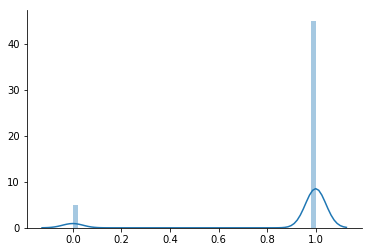

In [5]:
fig, ax = plt.subplots(1)
get_status = lambda run:[(i['S0'][0], i['S1'][0], i['S2'][0], i['S3'][0]) for i in run]
statuses = list(itertools.chain(*[get_status(run) for run in agent.full_record]))
any_on = lambda status: any([i==0 for i in status])
rewards = [any_on(status) for status in statuses]
print('on {} % of time'.format(sum(rewards)/len(rewards)))
sns.distplot(rewards)
sns.despine()

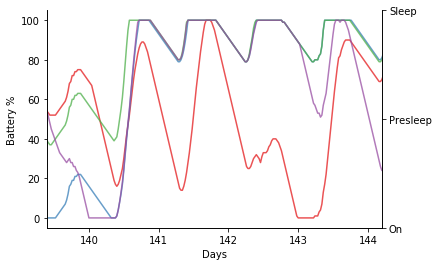

In [11]:
run=0
sensors = ['S0','S1','S2','S3']
fig, ax = plt.subplots(1)
fig.set_size_inches([6,4])
colors = ["#e41a1c","#377eb8","#4daf4a","#984ea3"]
for idx,sensor in enumerate(sensors):
    ax.plot([i[sensor][1] for i in agent.full_record[run]], color=colors[idx], alpha=0.75)
    pass
startday =140
periods = 48#in half hours 48 periods make a full day
duration =5#days
ax.set_xlim([startday*periods,(startday+duration)*periods])
ax.set_ylabel('Battery %')
ax.set_xticklabels([int(x/48) for x in ax.get_xticks()])
ax.set_xlabel('Days')
ax2 = ax.twinx()
#for idx,sensor in enumerate(sensors):
#    ax2.plot([i[sensor][0] for i in agent.full_record[run]], color=colors[idx], alpha=0.5,marker='o', markersize=1)
ax2.set_yticks([0,1,2])
ax2.set_yticklabels(['On','Presleep','Sleep'])
sns.despine(top=True, right=False)
#fig.savefig('_node_solar_simulation.png', format ='png')